Set up the notebook and load the necessary libraries.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline


Define the routines that will be used to determine the derivatives of the variables at a given time.

We start with a 10 compartment model for the butterfly.  Still keeping mu = 0.   Around m  equal to 9 and 10, there are really strange period shifts.

In [10]:
N=int(10)
m= 9.0
c= 2.8
d= 0.1
g= 0.6

def ButterflyRate(y):
    bFlies = np.zeros(N)
    for lupe in range(N):
        bFlies[lupe] = (1.0+float(lupe+1)*m/float(N)) * y[lupe]*(1.0-y[lupe]) \
            - (1.0+float(lupe+1)*m/float(N))*y[lupe]*y[N]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
        #rans = (1+2*m/N)*y[1]*(1-y[1]) -(1+2*m/N)*y[1]*y[10]/(c+(1+2*m/N)*y[1])
    return bFlies;

def W(y):
    #ans = -d*y[10]+ (g/N)*y[10]*((1+m/N)*y[0]/(c+(1+m/N)*y[0])+(1+2*m/N)*y[1]/(c+(1+2*m/N)*y[1])+(1+3*m/N)*y[2]/(c+(1+3*m/N)*y[2])+(1+4*m/N)*y[3]/(c+(1+4*m/N)*y[3])+(1+5*m/N)*y[4]/(c+(1+5*m/N)*y[4])+(1+6*m/N)*y[5]/(c+(1+6*m/N)*y[5])+(1+7*m/N)*y[6]/(c+(1+7*m/N)*y[6])+(1+8*m/N)*y[7]/(c+(1+8*m/N)*y[7])+(1+9*m/N)*y[8]/(c+(1+9*m/N)*y[8])+(1+10*m/N)*y[9]/(c+(1+10*m/N)*y[9]))
    ans = 0.0
    for lupe in range(N):
        ans += (1.0+float(lupe+1)*m/float(N))*y[lupe]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
    return(-d*y[N] + (g/float(N))*y[N]*ans)

def deriv(y,t):
    B = np.append(ButterflyRate(y),[W(y)])
    return(B) 


We first plot the total butterfly population

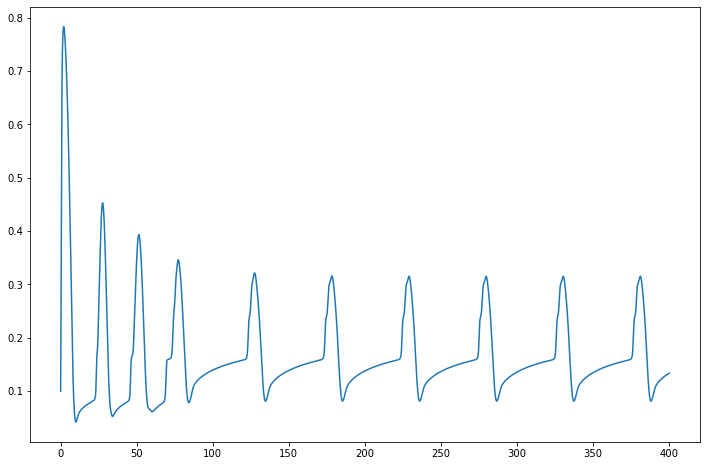

In [11]:
    
time = np.arange(0, 400, 0.01)
   
yinit = np.array([.1,.1, .1,.1,.1,.1,.1,.1,.1,.1, .9])
y = odeint(deriv,yinit,time)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time,(y[:,0]+y[:,1]+y[:,2]+y[:,3]+y[:,4]+y[:,5]+y[:,6]+y[:,7]+y[:,8]+y[:,9])/N)
plt.show()

Now we plot the wasp population.

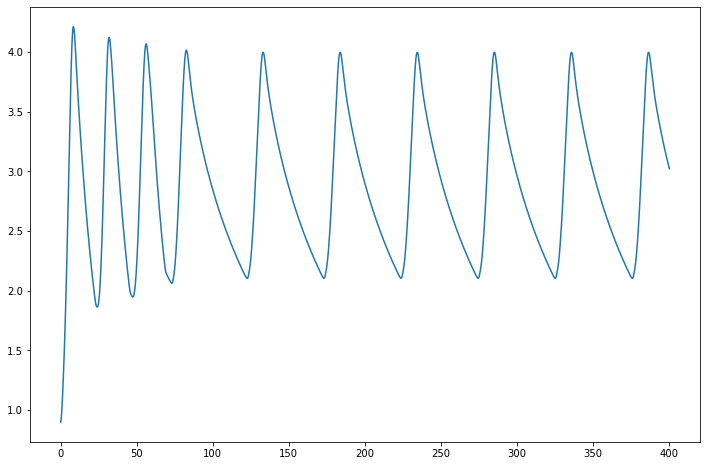

In [4]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time,y[:,10])
plt.show()

And below we see the last 5 compartments plotted.

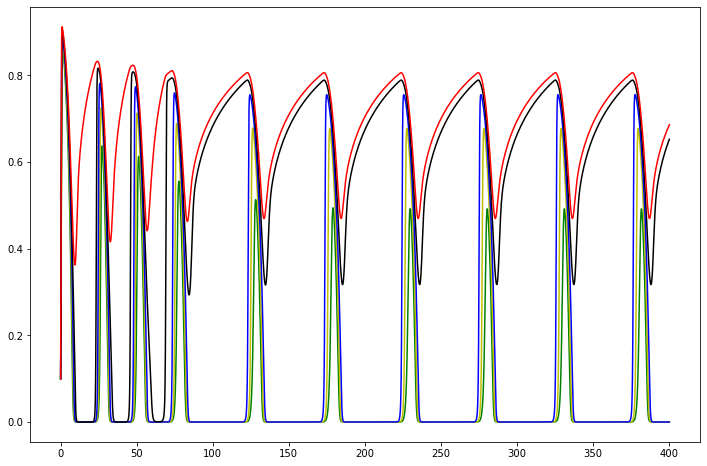

In [5]:
plt.plot(time,y[:,5],'g')
plt.plot(time,y[:,6],'y')
plt.plot(time,y[:,7],'b')
plt.plot(time,y[:,8],'k')
plt.plot(time,y[:,9],'r')
plt.show()

In the following cells, we add a nearest neighbor diffusion term, with Neumann boundary conditions.

In [6]:
mu=0.01
N=int(10)
m=12.0
c=2.8
d= 0.1
g= 0.6

    
def ButterflyRate(y):
    bFlies = np.zeros(N)
    for lupe in range(N):
        # First add the logistic and predation terms.
        bFlies[lupe] = (1.0+float(lupe+1)*m/float(N)) * y[lupe]*(1.0-y[lupe]) \
            - (1.0+float(lupe+1)*m/float(N))*y[lupe]*y[N]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
        
    # Now add the mixing.
    bFlies[0] += mu*(y[1]-y[0])
    for lupe in range(1,N-1):
        bFlies[lupe] += mu*(y[lupe-1]-2.0*y[lupe]+y[lupe+1])
    bFlies[N-1] += mu*(-y[N-1]+y[N])

    return bFlies;

def W(y):
    #ans = -d*y[10]+ (g/N)*y[10]*((1+m/N)*y[0]/(c+(1+m/N)*y[0])+(1+2*m/N)*y[1]/(c+(1+2*m/N)*y[1])+(1+3*m/N)*y[2]/(c+(1+3*m/N)*y[2])+(1+4*m/N)*y[3]/(c+(1+4*m/N)*y[3])+(1+5*m/N)*y[4]/(c+(1+5*m/N)*y[4])+(1+6*m/N)*y[5]/(c+(1+6*m/N)*y[5])+(1+7*m/N)*y[6]/(c+(1+7*m/N)*y[6])+(1+8*m/N)*y[7]/(c+(1+8*m/N)*y[7])+(1+9*m/N)*y[8]/(c+(1+9*m/N)*y[8])+(1+10*m/N)*y[9]/(c+(1+10*m/N)*y[9]))
    ans = 0.0
    for lupe in range(N):
        ans += (1.0+float(lupe+1)*m/float(N))*y[lupe]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
    return(-d*y[N] + (g/float(N))*y[N]*ans)

def deriv(y,t):
    B = np.append(ButterflyRate(y),[W(y)])
    return(B) 


Make the approximation. We first plot the total butterfly population

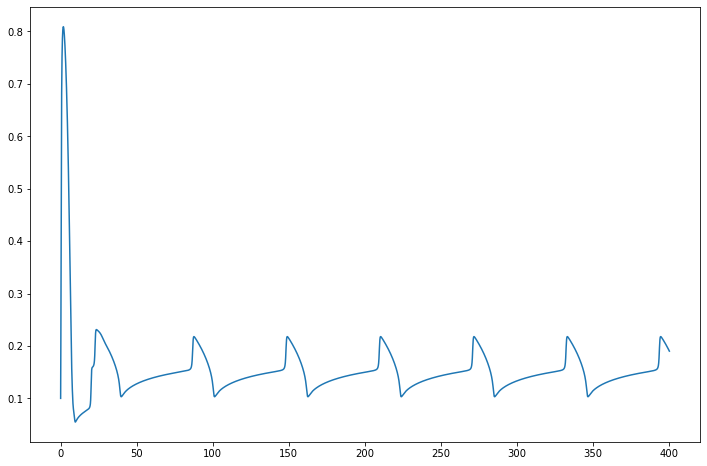

In [7]:
time = np.arange(0, 400, 0.01)
   
yinit = np.array([.1,.1, .1,.1,.1,.1,.1,.1,.1,.1, .9])
y = odeint(deriv,yinit,time)

plt.plot(time,(y[:,0]+y[:,1]+y[:,2]+y[:,3]+y[:,4]+y[:,5]+y[:,6]+y[:,7]+y[:,8]+y[:,9])/N)
plt.show()

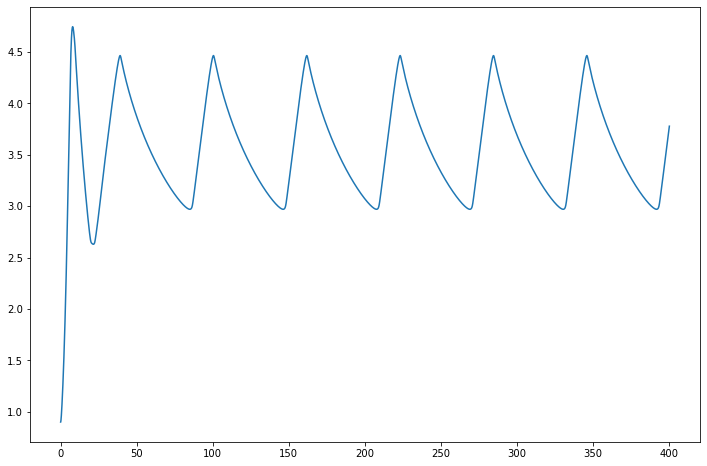

Now we plot the wasp population.


In [8]:
plt.plot(time,y[:,10])
plt.show()
print('Now we plot the wasp population.')

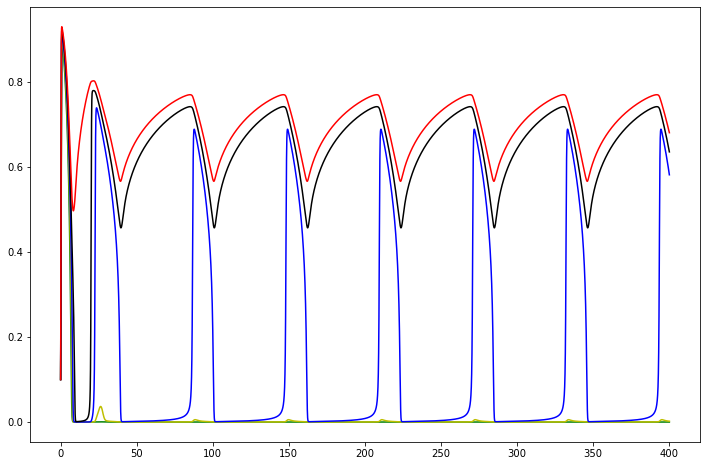

And below we see the last 5 compartments plotted.


In [9]:
plt.plot(time,y[:,5],'g')
plt.plot(time,y[:,6],'y')
plt.plot(time,y[:,7],'b')
plt.plot(time,y[:,8],'k')
plt.plot(time,y[:,9],'r')
plt.show()
print('And below we see the last 5 compartments plotted.')